# KNN For Regression

Advertising Dataset

We see that the dataset contains 4 columns (also known as features or variables). The first 3 columns are the independent variable, while the last column is the dependent variable that contains a continuous values. Dataset provides information about money spends on different media platform and total sale. We can predict sales on basis of money spend on different media platform. This is Supervised Machine learning problem. It is defined by its use of labeled datasets to train algorithms that predict outcomes accurately. A regression model is a statistical model that estimates the relationship between one dependent variable and one or more independent variables using a line.

Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the Dataset

In [2]:
hp = pd.read_csv(r'C:\Users\user\Desktop\advertising.csv')

In [3]:
hp.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
hp.shape

(200, 4)

In [5]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
hp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


# Discover of outliers

Importance of detecting an outlier- An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease. Let us detect the extreme values in the data.

The following four variables having outliers:

1) Newspaper Here use box plot to find outliers.

In [7]:
medianFiller = lambda x : x.fillna(x.median())
numeric_columns = hp.select_dtypes(include=np.number).columns.tolist()
hp[numeric_columns] = hp[numeric_columns].apply(medianFiller, axis = 0)

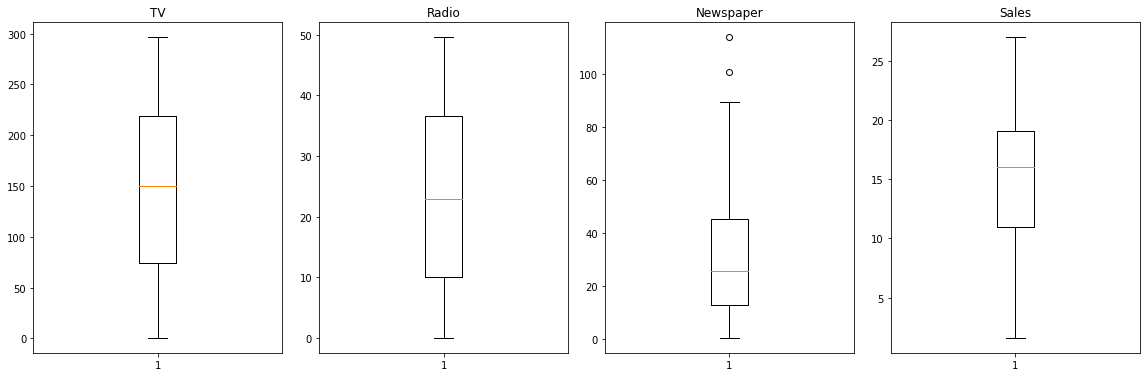

In [8]:
# outliers detection using boxplot
plt.figure(figsize =(20, 30))

for i , variable in enumerate(numeric_columns):
    plt.subplot(6 , 5, i +1)
    plt.boxplot(hp[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
    
plt.show()

# Remove outlier

In [9]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    hp[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(hp , c)
    return df1

In [10]:
hp = treat_outliers_all(hp , hp.iloc[:, [2]])

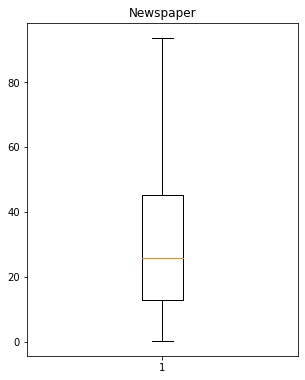

In [11]:
plt.figure(figsize=(20,30))
for i , variable in enumerate(hp.iloc[:,[2]]):
    plt.subplot(6,5,i+1)
    plt.boxplot(hp[variable] , whis = 1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

# Model Creation

# K-Nearest Neighbor classification

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(hp.drop(['Sales'],axis=1), 
                                                    hp['Sales'], test_size=0.20, 
                                                    random_state=12)

In [19]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=7).fit(X_train, y_train)

# Score
score_knn = knn_model.score(X_test, y_test)
score_knn
print(score_knn*100,'%')

93.22117697489244 %
